## Classification: Iris dataset

In [1]:
#from sklearn.datasets import load_iris
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygraphviz

In [2]:
iris = pd.read_csv('datasets/Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


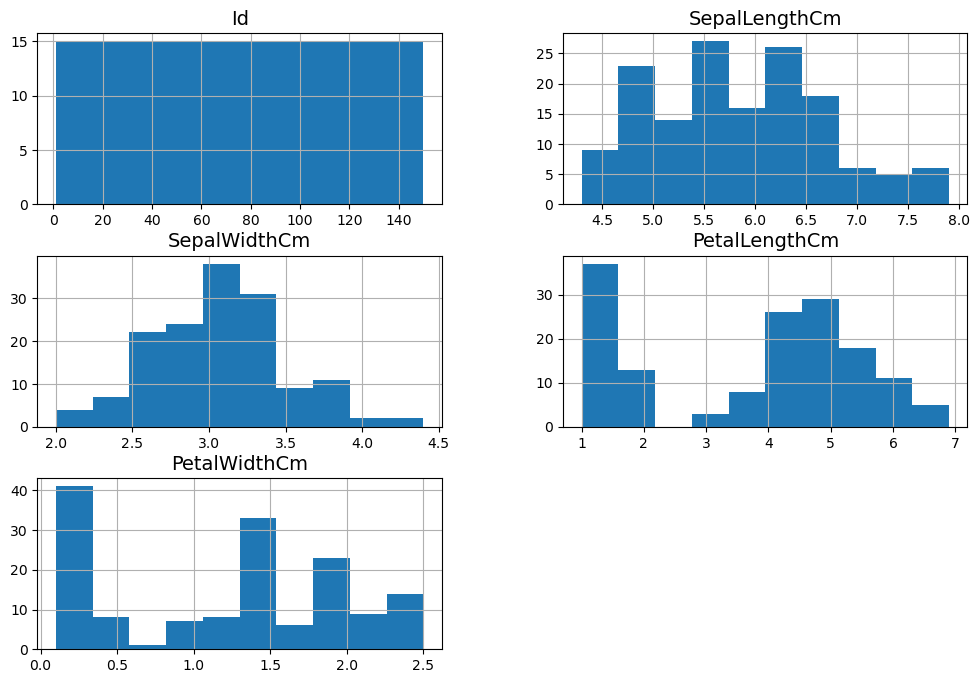

In [8]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

iris.hist(bins=10, figsize=(12, 8))
plt.savefig("iris_attribute_histogram_plots.png", dpi=300)
plt.show()

In [8]:
new_iris = iris.drop("Id", axis=1)
X = iris[iris.columns[1:-1]]
y = iris[iris.columns[-1]]
new_iris.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [12]:
models = [
    DecisionTreeClassifier(criterion='entropy'),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [13]:
# CROSS VALIDATION
from sklearn.model_selection import cross_val_score
for clf in models:
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"{scores.mean():.2f} ± {scores.std():.2f}\t{str(clf).split('(')[0]}")

0.93 ± 0.02	DecisionTreeClassifier
0.97 ± 0.02	KNeighborsClassifier
0.96 ± 0.03	SVC
0.96 ± 0.03	RandomForestClassifier
0.98 ± 0.02	MLPClassifier
0.90 ± 0.04	AdaBoostClassifier
0.95 ± 0.04	GaussianNB
0.97 ± 0.02	QuadraticDiscriminantAnalysis


In [14]:
for clf in models:
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print(f"{score:.2f}\t{clf}")

0.97	DecisionTreeClassifier(criterion='entropy')
0.97	KNeighborsClassifier(n_neighbors=3)
0.97	SVC(C=0.025, kernel='linear')
0.97	RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
0.93	MLPClassifier(max_iter=1000)
0.97	AdaBoostClassifier()
1.00	GaussianNB()
0.93	QuadraticDiscriminantAnalysis()


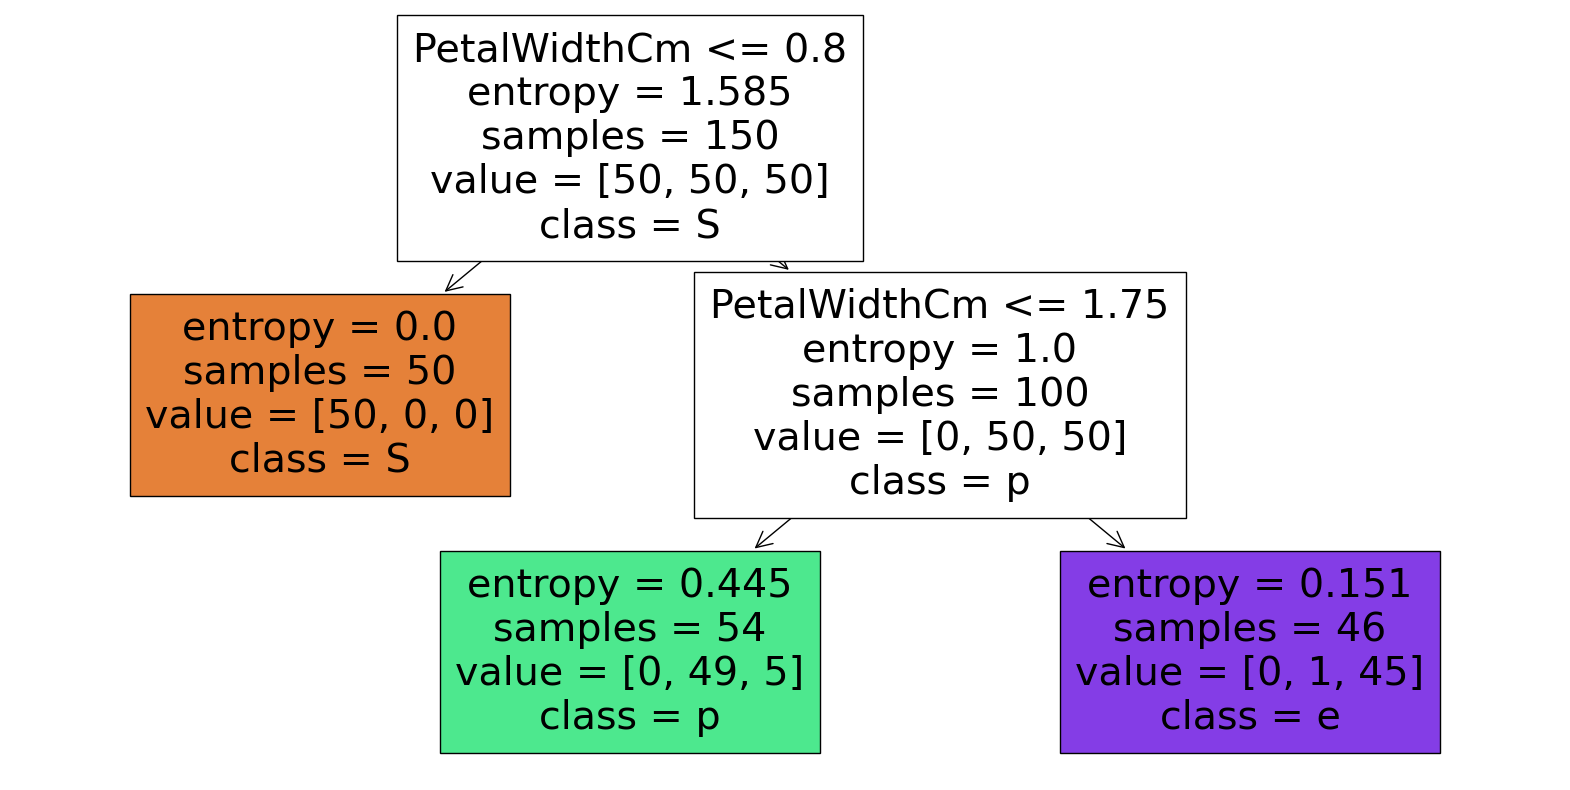

In [16]:
feature_names = iris.columns[1:-1]
class_names = iris.columns[-1]
# criterion{“gini”, “entropy”, “log_loss”}
# min_samples_split, min_samples_leaf, max_features
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf = clf.fit(X, y)
fig = plt.figure(figsize=[20,10])
ax = plt.gca()
_ = tree.plot_tree(clf, filled=True, ax=ax, class_names=class_names, feature_names=feature_names)

In [21]:
fig.savefig("iris_tree.png")
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names,
                                filled=True)

graph = pygraphviz.AGraph(dot_data)
graph.draw("./test_iris.png", prog="dot")
#draw(dot_data, format="png") 
#graph